In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)
import numpy as np
from PIL import Image

In [8]:
import pandas as pd

XData = pd.read_csv('F:\\learning\\Mechanical\\Brantun\\Git\\databook_python\\DATA\\ovariancancer_obs.csv' , header=None) # read x data
YData = pd.read_csv('F:\\learning\\Mechanical\\Brantun\\Git\\databook_python\\DATA\\ovariancancer_grp.csv' , header=None) # read label data
result = pd.concat([XData, YData], axis=1) # concatinate x and label data
result.head() # show first 5 rows

,0,1,2,3,4,5,6,7,8,9,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,0
0,0.063915,0.033242,0.018484,0.008618,0.035629,0.037925,0.028865,0.061731,0.063100,0.024787,...,0.021515,0.017385,0.018564,0.010027,0.012907,0.023405,0.038839,0.038151,0.032085,Cancer
1,0.025409,0.051085,0.056305,0.021738,0.027410,0.014914,0.022455,0.023957,0.060527,0.047382,...,0.055033,0.080864,0.053423,0.051942,0.013187,0.028573,0.020427,0.023261,0.019975,Cancer
2,0.025536,0.036123,0.054195,0.009735,0.027521,0.052255,0.042812,0.069087,0.069873,0.066629,...,0.033783,0.029022,0.046397,0.033288,0.041889,0.019256,-0.009447,0.021481,0.025569,Cancer
3,0.012817,0.029652,0.079290,0.050677,0.039737,0.057713,0.044492,0.034581,0.042587,0.034147,...,0.036083,0.038598,0.048881,0.025569,0.026710,0.025122,0.047466,0.046706,0.043482,Cancer
4,0.019846,-0.010577,-0.007504,0.019042,0.068786,0.061764,0.039036,0.020445,0.025988,0.066716,...,0.032044,0.026320,0.072016,0.070145,0.055744,0.051084,0.036683,0.043729,0.040289,Cancer


(216, 4000)


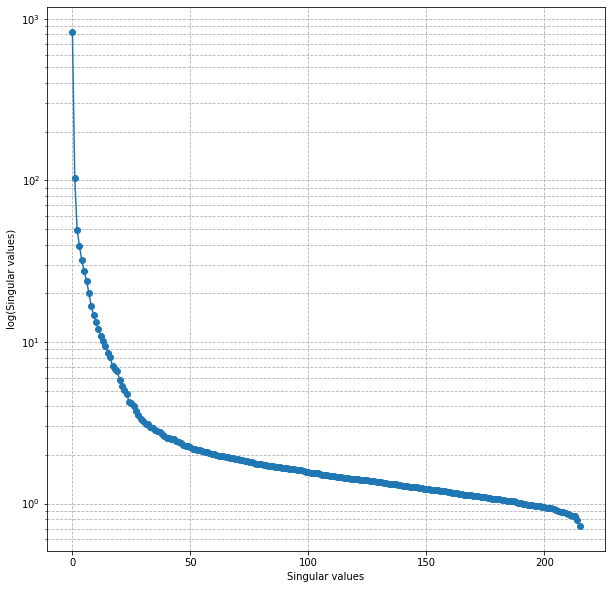

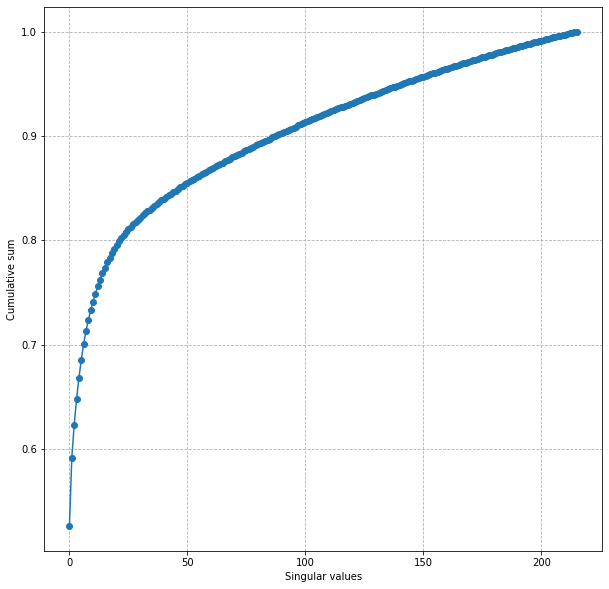

In [9]:
x = np.array(XData) # convert to numpy array
print(x.shape) # show shape of x
y = np.array(YData) # convert to numpy array
U, S, VT = np.linalg.svd(x,full_matrices=False) # perform SVD
plt.semilogy(S , '-o') # plot singular values
plt.xlabel('Singular values') 
plt.ylabel('log(Singular values)')
plt.grid(linestyle='--' , which='both')
plt.show()

plt.plot(np.cumsum(S)/np.sum(S) , '-o') # plot cumulative sum of singular values
plt.xlabel('Singular values')
plt.ylabel('Cumulative sum')
plt.grid(linestyle='--')
plt.show()

the first 3 features would capture around 65 percent of the data

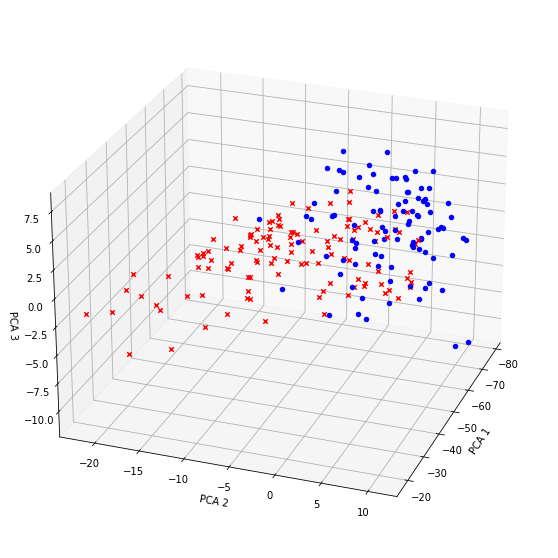

In [14]:
fig = plt.figure() # create figure
ax = fig.add_subplot(111, projection='3d') # create subplot

for j in range(x.shape[0]):
    X = VT[0,:] @ x[j,:].T # project data to first principal component
    Y = VT[1,:] @ x[j,:].T # project data to second principal component
    Z = VT[2,:] @ x[j,:].T # project data to third principal component
    
    if y[j] == 'Cancer': # if label is cancer
        ax.scatter(X,Y,Z,marker='x',color='r') # plot data as red x
    else: # if label is not cancer
        ax.scatter(X,Y,Z,marker='o',color='b') # plot data as blue o

ax.view_init(25,20) # set view angle
ax.set_xlabel('PCA 1') # set x label
ax.set_ylabel('PCA 2') # set y label
ax.set_zlabel('PCA 3') # set z label
plt.show() # show plot

In [12]:
x.shape

(216, 4000)